<a href="https://colab.research.google.com/github/lilasch/Facial_Attribute_CNN/blob/main/milestone2_data_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Facial Attribute Classification**

Lila Schisgal and Phoebe Jeske


First, we import our data from two text files and partition it into training and validation data.

In [1]:
import tensorflow.keras as keras
import tensorflow as tf
import pandas as pd
import cv2
import numpy as np
import glob

# 40 attributes in total
num_attributes = 40

# Load attributes csv
attributes = pd.read_csv("list_attr_celeba.txt", skiprows = 1, delimiter="\s+|\t")

# Load csv with partitions values
partitions = pd.read_csv("list_eval_partition.txt", delimiter="\s+|\t", header = None)

partitions.columns = ['image_name', 'dataset'] # setting column header names for partitions
attributes['dataset'] = partitions['dataset'].values # copying the partition values into the attributes df


<ipython-input-1-3fdbb5a99879>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  attributes = pd.read_csv("list_attr_celeba.txt", skiprows = 1, delimiter="\s+|\t")


FileNotFoundError: [Errno 2] No such file or directory: 'list_attr_celeba.txt'

In [ ]:
# unzipping image data
import zipfile
zippath = 'img_align_celeba.zip'
targetfolder = 'images'

with zipfile.ZipFile(zippath, 'r') as zip_ref:
    zip_ref.extractall(targetfolder)

In [ ]:
# filter so just the eyeglasses attribute is included
glasses_df = attributes.iloc[:, [15, num_attributes]]

In [ ]:
# the image filenames need to be in their own column
glasses_df = glasses_df.reset_index()

In [ ]:
from sklearn.model_selection import train_test_split

# rename columns
glasses_df.rename(columns={'index': 'image_names'}, inplace=True)
glasses_df.rename(columns={'Eyeglasses': 'eyeglasses_or_not'}, inplace=True)

# splitting the data
train = glasses_df[glasses_df['dataset'] == 0]
train.drop(columns='dataset', inplace=True)
valid = glasses_df[glasses_df['dataset'] == 1]
valid.drop(columns='dataset', inplace=True)
test = glasses_df[glasses_df['dataset'] == 2]
test.drop(columns='dataset', inplace=True)

x_train_images = train.loc[:,'image_names']
train_labels = train.loc[:,'eyeglasses_or_not']
x_valid_images = valid.loc[:,'image_names']
valid_labels = valid.loc[:,'eyeglasses_or_not']
x_test_images = test.loc[:,'image_names']
test_labels = test.loc[:,'eyeglasses_or_not']

<ipython-input-28-6feed2010385>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns='dataset', inplace=True)
<ipython-input-28-6feed2010385>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.drop(columns='dataset', inplace=True)
<ipython-input-28-6feed2010385>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns='dataset', inplace=True)


In [ ]:
import cv2

# Train images
x_train = []
for i in x_train_images:
    image = 'all_images/img_align_celeba/'+i
    img = cv2.imread(image) # this isn't finding the image
    x_train.append(img)

# Valid images
x_valid = []
for i in x_valid_images:
    image = 'all_images/img_align_celeba/'+i
    img = cv2.imread(image) # this isn't finding the image
    x_valid.append(img)

# Test images
x_test = []
for i in x_test_images:
    image = 'all_images/img_align_celeba/'+i
    img = cv2.imread(image) # this isn't finding the image
    x_test.append(img)


In [ ]:
# Train labels
y_train=keras.utils.to_categorical(train_labels)
y_train = y_train
# Valid labels
y_valid=keras.utils.to_categorical(valid_labels)
y_valid = y_valid
# Test Labels
y_test=keras.utils.to_categorical(test_labels)
y_test = y_test


In [ ]:
# Normalization
x_train = np.array(x_train, dtype="float") / 255.0
x_valid = np.array(x_valid, dtype="float") / 255.0
x_test = np.array(x_test, dtype="float") / 255.0

In [ ]:
# A very simple model
input_shape = (218,178,3)
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.L2(0.01)))
model.add(keras.layers.Dense(2, activation='softmax'))
model.build(input_shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (218, 178, 128)           512       
                                                                 
 dense_3 (Dense)             (218, 178, 2)             258       
                                                                 
Total params: 770 (3.01 KB)
Trainable params: 770 (3.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])


# Fit
history = model.fit(x_train,
                    y_train,
                    epochs=25,
                    validation_data=(x_valid,y_valid),
                    batch_size=32,
                    verbose=1)

# '''
# early_stopping = keras.callbacks.EarlyStopping(
#     patience=5,
#     min_delta=0.001,
#     restore_best_weights=True,
# )

# network_history_std = model.fit(x_train, y_train, validation_data=(x_valid,y_valid),
#                                 epochs=1000000000, callbacks=[early_stopping])'''

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/accuracy_metrics.py", line 459, in sparse_categorical_accuracy
        matches = metrics_utils.sparse_categorical_matches(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 969, in sparse_categorical_matches
        matches = tf.cast(tf.equal(y_true, y_pred), backend.floatx())

    ValueError: Dimensions must be equal, but are 2 and 178 for '{{node Equal}} = Equal[T=DT_FLOAT, incompatible_shape_error=true](IteratorGetNext:1, Cast_1)' with input shapes: [?,2], [?,218,178].


THIS IS WHERE OUR OLD CODE STARTS:

We then separate our target y values and image filenames in preparation for accessing the actual images as vectors.

In [ ]:
import shutil

# getting our image file names in three arrays
# train_files = train_df.index
# valid_files = valid_df.index
# test_files = test_df.index


image_folder = "/content/all_images/img_align_celeba"
valid_folder = "/content/drive/MyDrive/valid_images"
train_folder = "/content/drive/MyDrive/train_images"
test_folder = "/content/drive/MyDrive/test_images"

In [ ]:
import os

# Function to split images based on classification
def split_images(source_folder):
    files = os.listdir()  # Get the list of files in the source_folder
    for file in files:
        if file in train_files:
            if not os.path.exists(os.path.join(train_folder, file)):
                shutil.move(os.path.join(source_folder, file), os.path.join(train_folder, file))
        elif file in valid_files:
              if not os.path.exists(os.path.join(valid_folder, file)):
                  shutil.move(os.path.join(source_folder, file), os.path.join(valid_folder, file))
        elif file in test_files:
              if not os.path.exists(os.path.join(test_folder, file)):
                  shutil.move(os.path.join(source_folder, file), os.path.join(test_folder, file))


split_images(image_folder)

Next: need to access the images from the dataset and put them into a set of vectors.

In [ ]:
from re import X
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# separating out target values
y_train = train_df['Eyeglasses']
y_valid = valid_df['Eyeglasses']
y_test = test_df['Eyeglasses']

# getting x_train and y_train as separate arrays
x_train = train_df.index.to_numpy()
y_train = y_train.values

# building a dataframe for training data
train_df = pd.DataFrame(columns=['image_name','eyeglasses_or_not'])
train_df['image_name'] = x_train
train_df['eyeglasses_or_not'] = y_train

AttributeError: 'numpy.ndarray' object has no attribute 'values'

Now, for the ImageDataGenerator:

Found 0 validated image filenames belonging to 0 classes.
(0, 256, 256, 3)


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 162770 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


TypeError: Invalid shape (0, 256, 256, 3) for image data

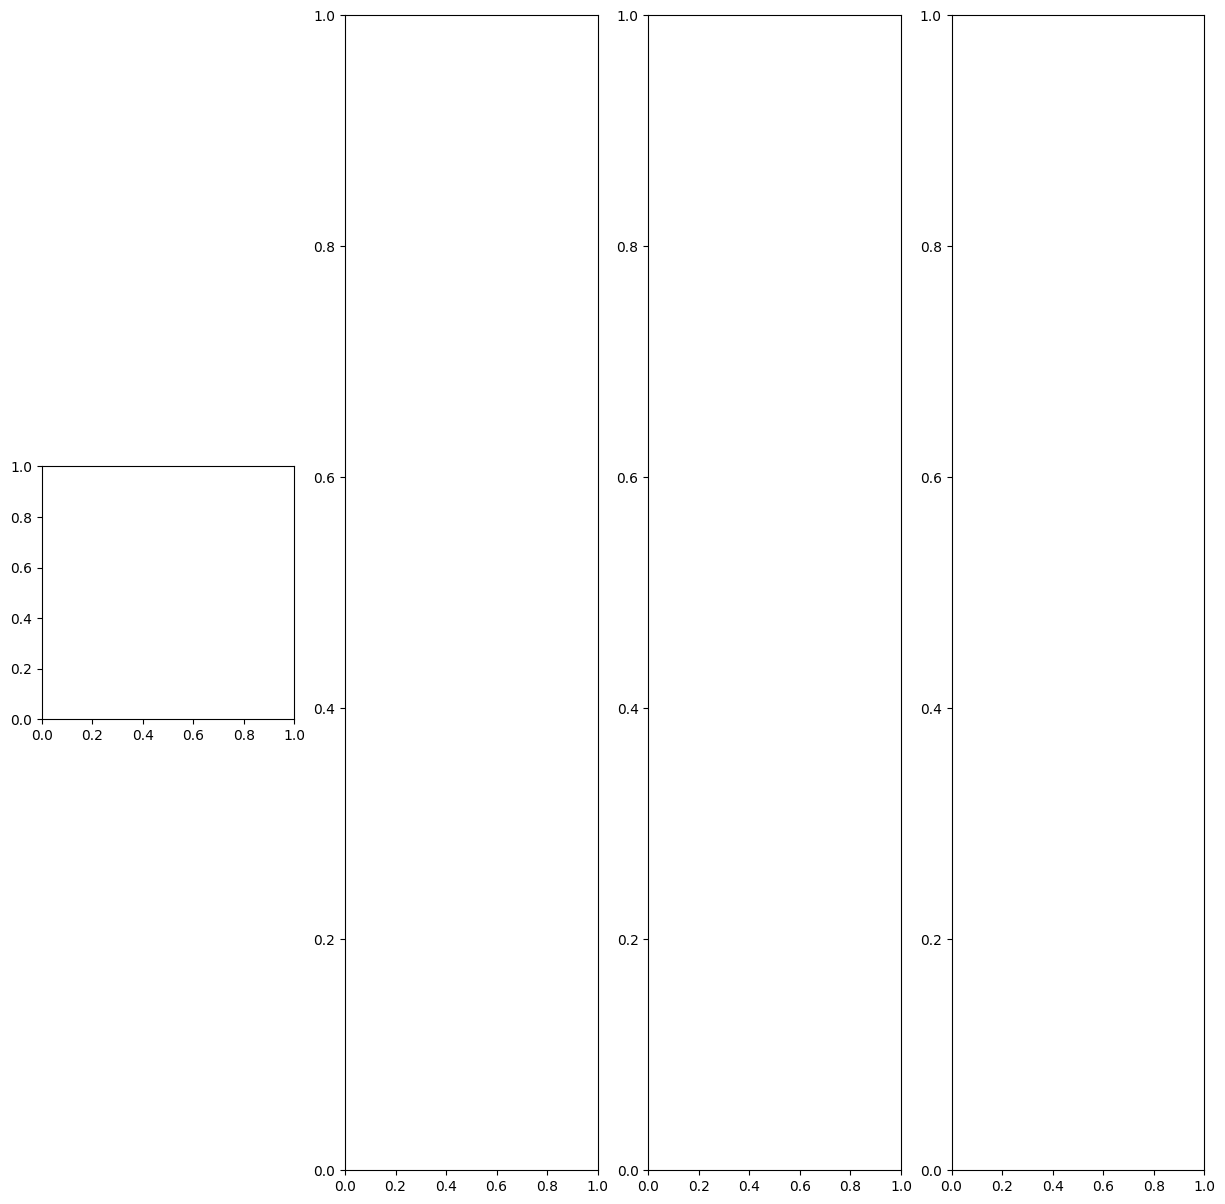

In [ ]:
# ImageDataGenerator that augments the images
datagen = ImageDataGenerator(
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness

train_df["eyeglasses_or_not"] = train_df["eyeglasses_or_not"].astype('str') # requires target in string format

train_generator_df = datagen.flow_from_dataframe(dataframe=train_df,
                                              directory='content/drive/MyDrive/train_images/',
                                              x_col="image_name",
                                              y_col="eyeglasses_or_not",
                                              class_mode="binary",
                                              batch_size=1,
                                              rescale=1.0/255)
'''
# plotting images
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):

  # convert to unsigned integers for plotting
  image = next(train_generator_df)[0].astype('uint8')

  # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
  image = np.squeeze(image)

  # plot raw pixel data
  ax[i].imshow(image)
  ax[i].axis('off')'''

'''
# Function to normalize images
def normalize_images(image_path):
    save_array = []
    for filename in os.listdir(image_path):
        if filename.endswith(".jpg"):
            img_path = os.path.join(image_path, filename)
            img = Image.open(img_path)
            img_array = np.array(img)
            flattened_dim = 218 * 178 * 3
            img_processed = img_array.reshape(-1, flattened_dim)
            img_processed = img_processed.astype(float)
            save_array.append(img_processed)
    return save_array

def standardize(train, test, valid):
    mean = np.mean(train)
    std = np.std(train)

    train = (train - mean)/std
    valid = (valid - mean)/std
    test = (test - mean)/std

    return train, test, valid

# Apply preprocessing steps
valid_images = normalize_images(valid_folder)'''

In [ ]:
# test_images = normalize_images(test_folder)


In [ ]:
# train_images = normalize_images(train_folder)

In [ ]:
# x_train, x_test, x_valid = standardize(train_images, test_images, valid_images)


In [ ]:
eval = model.evaluate(x_test,y_test)
print("Test loss:",eval[0])
print("Test accuracy:",eval[1])